# GMM and EM
Gaussian Mixture Models and Expectation Maximization.

Find discriminator x where the gaussians are equal.

In [1]:
import numpy as np
from matplotlib import pyplot
from sklearn.mixture import GaussianMixture
import scipy.stats as ss

In [2]:
try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/'  # must end in "/"
except:
    IN_COLAB = False
    DATA_DIR = 'D:/Adjeroh/Localization/TrainTest/'   # Windows
    DATA_DIR = '/Users/jasonmiller/WVU/Localization/TrainTest/'    # Mac
print(DATA_DIR)

/Users/jasonmiller/WVU/Localization/TrainTest/


In [3]:
GENES_FILE =    'CNRCI_noncoding_train_genes.csv'
RCI_FILE =      'CNRCI_noncoding_train_RCI.gc42.csv'

In [4]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080','HUVEC','MCF.7','NCI.H460','NHEK',\
     'SK.MEL.5','SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()

CELL_LINE = 0
print('Cell line for today',CELL_LINE,all_cell_lines[CELL_LINE])
EXCLUSIONS = [1,7]
for c in EXCLUSIONS:
    print('Exclude cell line',c,all_cell_lines[c])

Cell line for today 0 A549
Exclude cell line 1 H1.hESC
Exclude cell line 7 NCI.H460


In [5]:
class RCI_Loader():
    def __init__(self):
        self.cache=dict() 
        
    def load_gene_rci_values(self,filepath,cell_line):
        '''
        Load from RCI csv file.
        Return dict with keys=gene:str and values=RCI:float.
        '''
        gene_to_rci = {}
        overall_sum = 0
        with open (filepath,'r') as handle:
            header = None
            for row in handle:
                if header is None:
                    header = row # skip file's header line
                else:
                    line = row.strip()
                    fields = line.split(',')
                    gene_id = fields.pop(0)
                    rci_str = fields[cell_line]
                    if rci_str != "nan":
                        rci_val = float(rci_str)
                        gene_to_rci[gene_id] = rci_val
        return gene_to_rci

In [6]:
def plot(X,left=None,right=None,discrim=None,num_bins=100):
    pyplot.hist(X, bins=num_bins, density=True)
    if left is not None:
        pyplot.axvline(x=left,color='y')
    if right is not None:
        pyplot.axvline(x=right,color='y')
    if discrim is not None:
        pyplot.axvline(x=discrim,color='r')
    pyplot.show()
    
def show_gmm(model,X):
    print(model)
    print('AIC',model.aic(X),'BIC',model.bic(X),'score',model.score(X))
    for i in range(model.n_components):
        print('Gaussian',i,'mean=',model.means_[i],
            'wgt=',model.weights_[i], 'cov=',model.covariances_[i])

In [7]:
def place_discriminant(mean1,var1,wgt1,mean2,var2,wgt2):
    min_diff = 1.0
    bests = []
    left = None
    middle = None
    for i in range(10,91):
        if left is None:
            x = (i-1)/100.0 
            p1 = ss.norm(mean1,var1).pdf(x)*wgt1
            p2 = ss.norm(mean2,var2).pdf(x)*wgt2
            left = p1-p2
        if middle is None:
            x = (i)/100.0 
            p1 = ss.norm(mean1,var1).pdf(x)*wgt1
            p2 = ss.norm(mean2,var2).pdf(x)*wgt2
            middle = p1-p2
        x = (i+1)/100.0 
        p1 = ss.norm(mean1,var1).pdf(x)*wgt1
        p2 = ss.norm(mean2,var2).pdf(x)*wgt2
        right = p1-p2
        if left * right < 0:
            bests.append(x)
        left = middle
        middle = right
    if len(bests)==0:
        return None
    return np.mean(bests)

Cell Line 0 A549
Single mean [0.44521692]
Double mean [0.24989606] [0.60988421]
Gaussian discriminant 0.435


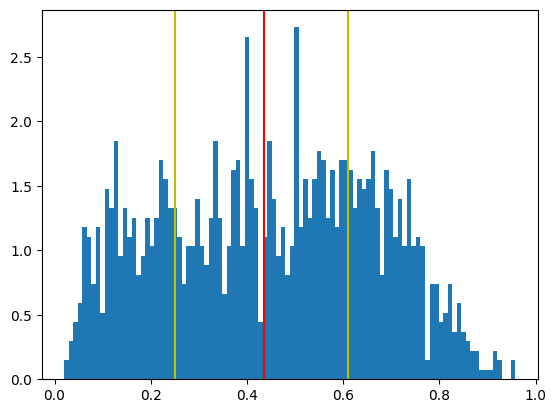

GaussianMixture(covariance_type='spherical', n_init=10)
AIC -269.0182802362439 BIC -258.46378478298095 score 0.09433941957022941
Gaussian 0 mean= [0.44521692] wgt= 1.0 cov= 0.048483328621034105
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -417.9467372260281 BIC -391.5604985928707 score 0.14787378618729374
Gaussian 0 mean= [0.24989606] wgt= 0.45742420893236035 cov= 0.015454337613182273
Gaussian 1 mean= [0.60988421] wgt= 0.5425757910676398 cov= 0.017050490024303783
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -457.985972737889 BIC -415.76799092483714 score 0.16378229880369352
Gaussian 0 mean= [0.43744751] wgt= 0.347318238987075 cov= 0.009413835029675242
Gaussian 1 mean= [0.67482588] wgt= 0.3550118783437645 cov= 0.010084180421585624
Gaussian 2 mean= [0.18044222] wgt= 0.29766988266916056 cov= 0.006813256750534249
Cell Line 1 H1.hESC
Single mean [0.44514622]
Double mean [0.59359798] [0.26637138]
Gaussian discriminant 0.405


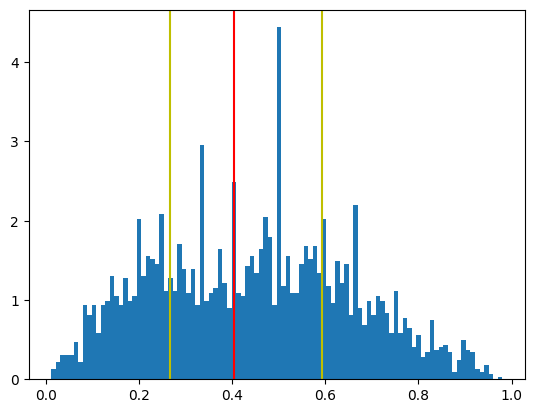

GaussianMixture(covariance_type='spherical', n_init=10)
AIC -902.1332442282468 BIC -889.9135916762099 score 0.1361787262140437
Gaussian 0 mean= [0.44514622] wgt= 1.0 cov= 0.044591496791277024
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -1083.186441503674 BIC -1052.6373101235815 score 0.16429011744870362
Gaussian 0 mean= [0.59359798] wgt= 0.5463334367076922 cov= 0.02122641465369171
Gaussian 1 mean= [0.26637138] wgt= 0.4536665632923078 cov= 0.01422929679799302
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -1143.3455375853518 BIC -1094.466927377204 score 0.17423287309668647
Gaussian 0 mean= [0.21634253] wgt= 0.3371069642555685 cov= 0.007844867079686435
Gaussian 1 mean= [0.69248746] wgt= 0.27817010861125885 cov= 0.01298784307897202
Gaussian 2 mean= [0.46679394] wgt= 0.3847229271331726 cov= 0.009066483777202731
Cell Line 2 HeLa.S3
Single mean [0.31180269]
Double mean [0.17585981] [0.53911422]
Gaussian discriminant 0.295


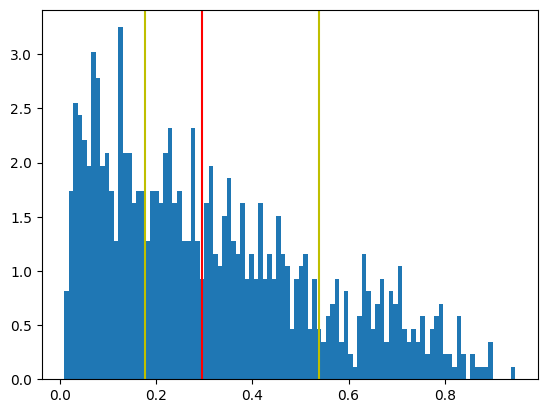

GaussianMixture(covariance_type='spherical', n_init=10)
AIC -165.9257594827505 BIC -156.27918723803913 score 0.09245144694382508
Gaussian 0 mean= [0.31180269] wgt= 1.0 cov= 0.04866674129990954
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -347.9381640988009 BIC -323.82173348702247 score 0.19474328841066424
Gaussian 0 mean= [0.17585981] wgt= 0.6257639887858933 cov= 0.011736833313760223
Gaussian 1 mean= [0.53911422] wgt= 0.37423601121410666 cov= 0.027845716094813983
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -418.8116472897972 BIC -380.22535831095166 score 0.23656781680620087
Gaussian 0 mean= [0.12255824] wgt= 0.4438030244221063 cov= 0.004925630857842265
Gaussian 1 mean= [0.66996056] wgt= 0.1869079093349244 cov= 0.012156948779308755
Gaussian 2 mean= [0.35795819] wgt= 0.3692890662429693 cov= 0.009617596464620707
Cell Line 3 HepG2
Single mean [0.34257]
Double mean [0.55518058] [0.18046449]
Gaussian discriminant 0.325


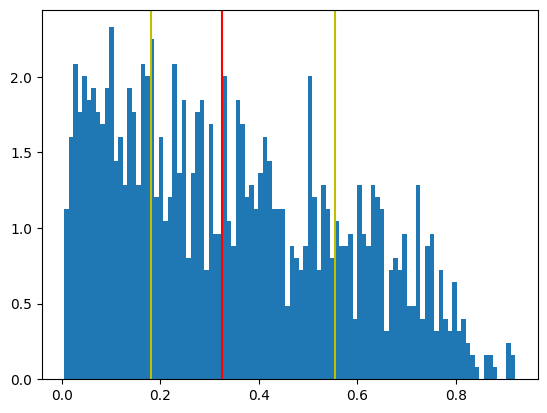

GaussianMixture(covariance_type='spherical', n_init=10)
AIC -177.33429494575816 BIC -166.90087597233924 score 0.06656912442942664
Gaussian 0 mean= [0.34257] wgt= 1.0 cov= 0.05125224772232309
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -399.5651169294619 BIC -373.48156949591464 score 0.1503543013691123
Gaussian 0 mean= [0.55518058] wgt= 0.4326088875352281 cov= 0.022269070415105424
Gaussian 1 mean= [0.18046449] wgt= 0.5673911124647719 cov= 0.012607006724056116
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -481.24454794632976 BIC -439.5108720526541 score 0.1825420513753046
Gaussian 0 mean= [0.62645372] wgt= 0.2945475767007884 cov= 0.013451056777171204
Gaussian 1 mean= [0.11978806] wgt= 0.3822174327583977 cov= 0.004931667857683844
Gaussian 2 mean= [0.3473154] wgt= 0.3232349905408139 cov= 0.008323069021489436
Cell Line 4 HT1080
Single mean [0.44976546]
Double mean [0.63083645] [0.24313315]
Gaussian discriminant 0.455


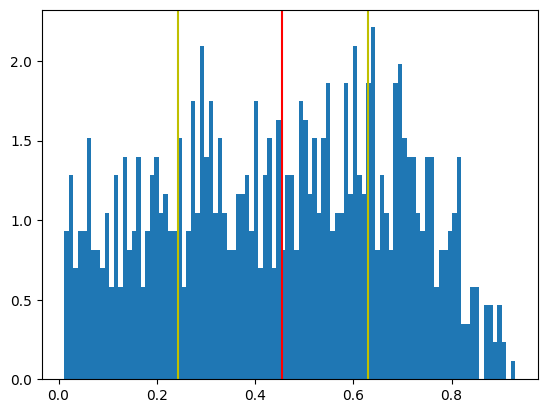

GaussianMixture(covariance_type='spherical', n_init=10)
AIC -57.08481820204331 BIC -47.401587249088124 score 0.032630778954082965
Gaussian 0 mean= [0.44976546] wgt= 1.0 cov= 0.05485179356332001
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -165.14705276384944 BIC -140.9389753814615 score 0.09356145980974863
Gaussian 0 mean= [0.63083645] wgt= 0.5329650607274099 cov= 0.017061192754146554
Gaussian 1 mean= [0.24313315] wgt= 0.46703493927259004 cov= 0.01786517003862588
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -179.6742749179403 BIC -140.94135110611955 score 0.1045268562595835
Gaussian 0 mean= [0.42478109] wgt= 0.3427851054007789 cov= 0.011878412485708588
Gaussian 1 mean= [0.68787115] wgt= 0.37448597170038556 cov= 0.010310217273666182
Gaussian 2 mean= [0.16467625] wgt= 0.2827289228988355 cov= 0.008823942942140945
Cell Line 5 HUVEC
Single mean [0.35563505]
Double mean [0.17766424] [0.57663423]
Gaussian discriminant 0.325


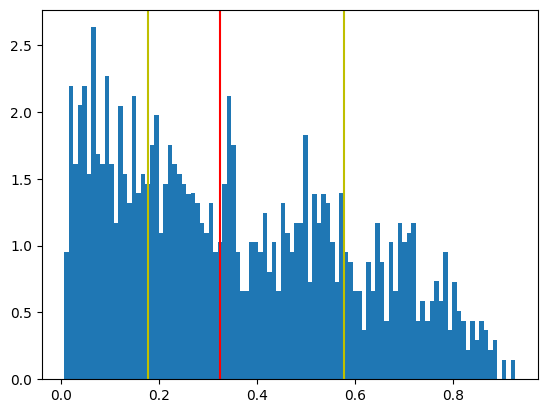

GaussianMixture(covariance_type='spherical', n_init=10)
AIC -45.78698495956086 BIC -35.176608528774786 score 0.016729497634261042
Gaussian 0 mean= [0.35563505] wgt= 1.0 cov= 0.05662422389102323
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -329.05201873339115 BIC -302.52607765642597 score 0.11392876973568251
Gaussian 0 mean= [0.17766424] wgt= 0.5539243156644631 cov= 0.012289157501195488
Gaussian 1 mean= [0.57663423] wgt= 0.44607568433553696 cov= 0.02350622933483379
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -389.5022882953949 BIC -347.0607825722506 score 0.13625748934657086
Gaussian 0 mean= [0.68707242] wgt= 0.23024055443694086 cov= 0.011401287128864816
Gaussian 1 mean= [0.40749687] wgt= 0.3427284474442443 cov= 0.012354731418505458
Gaussian 2 mean= [0.13531184] wgt= 0.4270309981188148 cov= 0.006608139628899736
Cell Line 6 MCF.7
Single mean [0.33172836]
Double mean [0.11563769] [0.49171192]
Gaussian discriminant 0.175


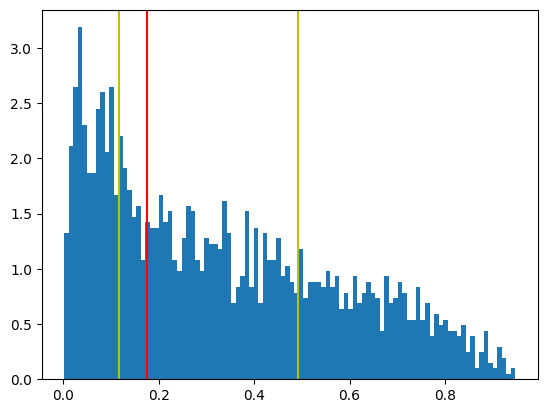

GaussianMixture(covariance_type='spherical', n_init=10)
AIC 54.49064223121418 BIC 65.84266209527196 score -0.011709332613917945
Gaussian 0 mean= [0.33172836] wgt= 1.0 cov= 0.05993817184415222
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -544.6320960129078 BIC -516.2520463527634 score 0.12862525417739049
Gaussian 0 mean= [0.11563769] wgt= 0.42540422159621055 cov= 0.005898979863019884
Gaussian 1 mean= [0.49171192] wgt= 0.5745957784037894 cov= 0.03978059961761152
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -690.6841947590092 BIC -645.2761153027781 score 0.1638878002687869
Gaussian 0 mean= [0.33411898] wgt= 0.40110598167107697 cov= 0.01467315522347398
Gaussian 1 mean= [0.67028011] wgt= 0.24839367492093528 cov= 0.015548561030218315
Gaussian 2 mean= [0.08906667] wgt= 0.3505003434079878 cov= 0.0030781985920615177
Cell Line 7 NCI.H460
Single mean [0.30614652]
Double mean [0.52483624] [0.1928324]
Gaussian discriminant 0.305


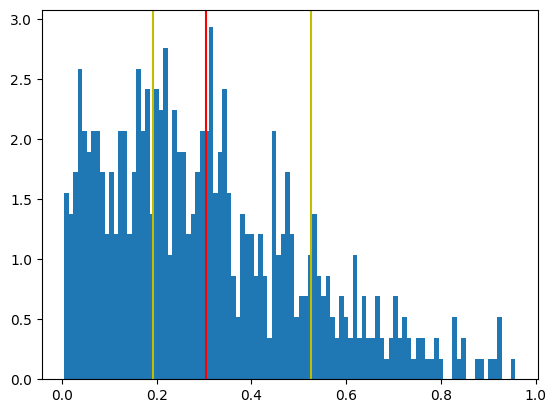

GaussianMixture(covariance_type='spherical', n_init=10)
AIC -179.46891544208557 BIC -170.64199752775085 score 0.15038435691974228
Gaussian 0 mean= [0.30614652] wgt= 1.0 cov= 0.04334245201655888
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -263.9859398368649 BIC -241.91864505102808 score 0.22457863921054497
Gaussian 0 mean= [0.52483624] wgt= 0.3413036359121663 cov= 0.029124471499152677
Gaussian 1 mean= [0.1928324] wgt= 0.6586963640878337 cov= 0.013088778222838547
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -281.0963681177227 BIC -245.78869646038385 score 0.24352161321124813
Gaussian 0 mean= [0.33504573] wgt= 0.3891871555347151 cov= 0.009980133660263497
Gaussian 1 mean= [0.61144082] wgt= 0.20410555403317795 cov= 0.022248032483701913
Gaussian 2 mean= [0.12528066] wgt= 0.4067072904321069 cov= 0.005567533208134869
Cell Line 8 NHEK
Single mean [0.37104023]
Double mean [0.19028773] [0.56564469]
Gaussian discriminant 0.355


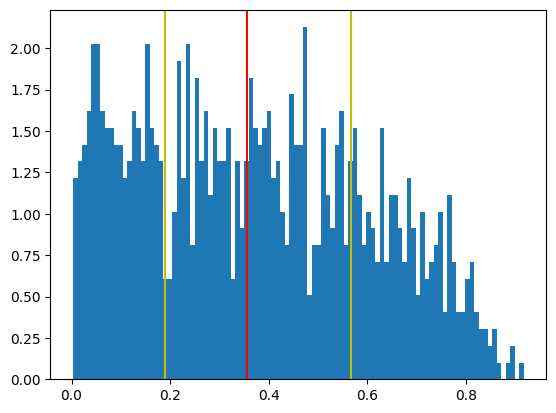

GaussianMixture(covariance_type='spherical', n_init=10)
AIC -97.31790263260538 BIC -87.34846999236885 score 0.046906436403983974
Gaussian 0 mean= [0.37104023] wgt= 1.0 cov= 0.05330787659218958
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -223.68695534536533 BIC -198.76337374477401 score 0.10818840525248395
Gaussian 0 mean= [0.19028773] wgt= 0.5184517212981137 cov= 0.014661554844983415
Gaussian 1 mean= [0.56564469] wgt= 0.48154827870188627 cov= 0.02186971899935683
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -282.6579767733857 BIC -242.78024621243958 score 0.13826758183953042
Gaussian 0 mean= [0.37194715] wgt= 0.3654843964701604 cov= 0.010085207358620922
Gaussian 1 mean= [0.646979] wgt= 0.3019283033777427 cov= 0.012428626300667682
Gaussian 2 mean= [0.11954178] wgt= 0.3325873001520969 cov= 0.005541142547346472
Cell Line 9 SK.MEL.5
Single mean [0.30581079]
Double mean [0.16475803] [0.53664554]
Gaussian discriminant 0.295


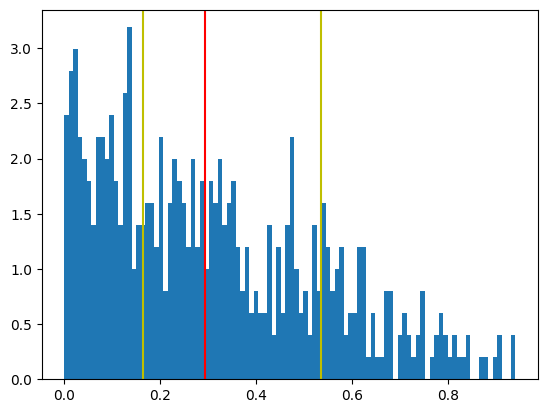

GaussianMixture(covariance_type='spherical', n_init=10)
AIC -73.86458029902836 BIC -65.30378862110797 score 0.07290691039234866
Gaussian 0 mean= [0.30581079] wgt= 1.0 cov= 0.050606708776164244
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -165.01940151485834 BIC -143.61742232005736 score 0.1638758441150359
Gaussian 0 mean= [0.16475803] wgt= 0.6207112335249202 cov= 0.012630815134845862
Gaussian 1 mean= [0.53664554] wgt= 0.37928876647507986 cov= 0.02691021546668057
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -208.34995142150655 BIC -174.10678470982498 score 0.2100654975856803
Gaussian 0 mean= [0.2824413] wgt= 0.337881896780003 cov= 0.008021025833311225
Gaussian 1 mean= [0.56974644] wgt= 0.31887664625074663 cov= 0.02350680705461497
Gaussian 2 mean= [0.08361505] wgt= 0.34324145696925046 cov= 0.0030780071513376887
Cell Line 10 SK.N.DZ
Single mean [0.42848037]
Double mean [0.257032] [0.57717814]
Gaussian discriminant 0.425


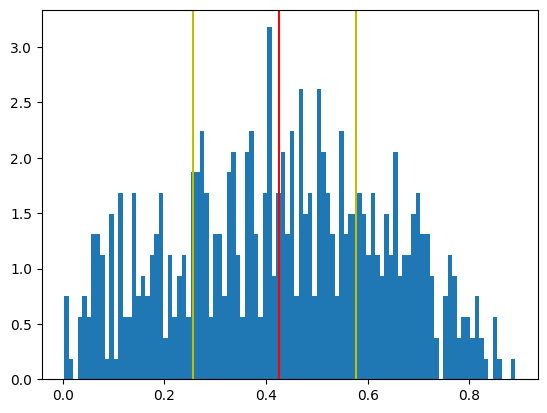

GaussianMixture(covariance_type='spherical', n_init=10)
AIC -184.37907334444697 BIC -175.5752389509926 score 0.15620155335360444
Gaussian 0 mean= [0.42848037] wgt= 1.0 cov= 0.042841122523157915
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -210.77913444198072 BIC -188.7695484583448 score 0.18306727565670042
Gaussian 0 mean= [0.257032] wgt= 0.46446842367652236 cov= 0.01761019253498633
Gaussian 1 mean= [0.57717814] wgt= 0.5355315763234777 cov= 0.017118978143243563
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -219.3313914920039 BIC -184.1160539181864 score 0.195133823791048
Gaussian 0 mean= [0.42406286] wgt= 0.38577562919863373 cov= 0.008191135008083576
Gaussian 1 mean= [0.65179311] wgt= 0.3270893157078181 cov= 0.009457576769252766
Gaussian 2 mean= [0.18002919] wgt= 0.28713505509354814 cov= 0.008861448183676629
Cell Line 11 SK.N.SH
Single mean [0.35515236]
Double mean [0.53174195] [0.14140399]
Gaussian discriminant 0.235


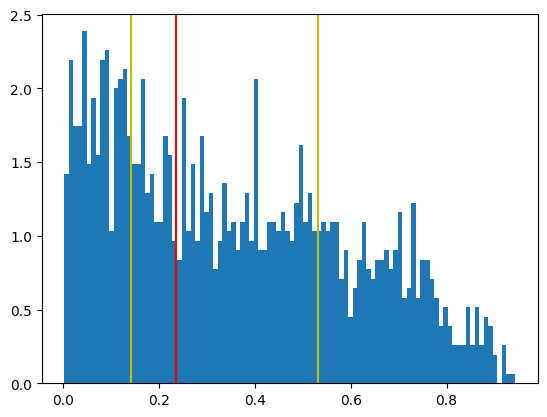

GaussianMixture(covariance_type='spherical', n_init=10)
AIC 24.55902434295773 BIC 35.37244580331301 score -0.006241355295372717
Gaussian 0 mean= [0.35515236] wgt= 1.0 cov= 0.059286272718222593
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -324.95091181160853 BIC -297.9173581607203 score 0.10168515841275305
Gaussian 0 mean= [0.53174195] wgt= 0.5475982311484136 cov= 0.032312649387479825
Gaussian 1 mean= [0.14140399] wgt= 0.4524017688515864 cov= 0.008501703798104122
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -383.2208967981007 BIC -339.96721095667954 score 0.12119638639893766
Gaussian 0 mean= [0.40187838] wgt= 0.3507208800981813 cov= 0.01193356575751328
Gaussian 1 mean= [0.12270101] wgt= 0.4123211378634903 cov= 0.005962548686313404
Gaussian 2 mean= [0.69047265] wgt= 0.23695798203832857 cov= 0.01246638176810985
Cell Line 12 GM12878
Single mean [0.35903422]
Double mean [0.52495397] [0.20085271]
Gaussian discriminant 0.335


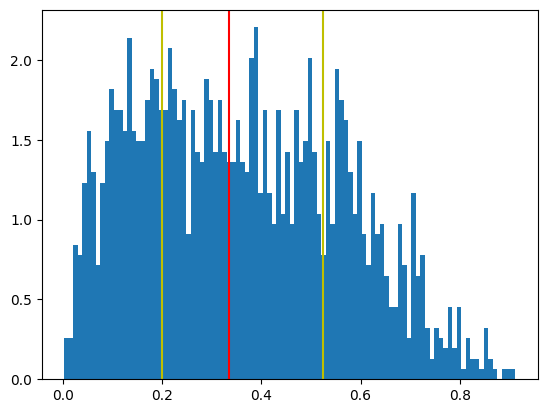

GaussianMixture(covariance_type='spherical', n_init=10)
AIC -600.4665065387094 BIC -589.5920938049668 score 0.17799367094779428
Gaussian 0 mean= [0.35903422] wgt= 1.0 cov= 0.04101407303445678
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -778.0403873102882 BIC -750.8543554759318 score 0.2320495840136302
Gaussian 0 mean= [0.52495397] wgt= 0.48806198588946653 cov= 0.018802071534665815
Gaussian 1 mean= [0.20085271] wgt= 0.5119380141105335 cov= 0.010923313800723816
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -810.6949046755083 BIC -767.1972537405379 score 0.24343195072894824
Gaussian 0 mean= [0.15205192] wgt= 0.3610925873888332 cov= 0.0055000069253730325
Gaussian 1 mean= [0.59307741] wgt= 0.30733356633220477 cov= 0.012762928721562565
Gaussian 2 mean= [0.36751029] wgt= 0.33157384627896186 cov= 0.008376367078391149
Cell Line 13 K562
Single mean [0.38564324]
Double mean [0.54960501] [0.21994059]
Gaussian discriminant 0.365


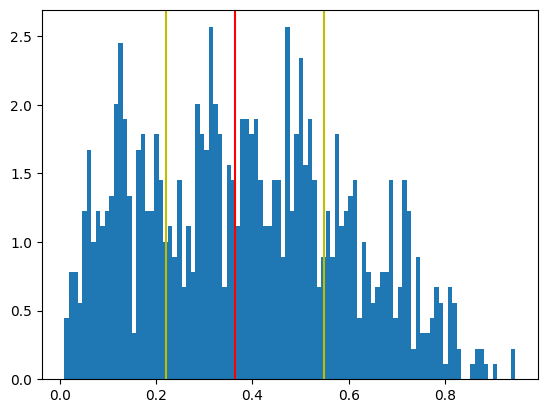

GaussianMixture(covariance_type='spherical', n_init=10)
AIC -250.46395954965362 BIC -240.7342639937119 score 0.13280999976495492
Gaussian 0 mean= [0.38564324] wgt= 1.0 cov= 0.04489293749425316
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -311.43153582063894 BIC -287.1072969307846 score 0.16776176191056313
Gaussian 0 mean= [0.54960501] wgt= 0.5026403714259532 cov= 0.02097169468541113
Gaussian 1 mean= [0.21994059] wgt= 0.49735962857404686 cov= 0.014441898282037373
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -357.6240307388339 BIC -318.705248515067 score 0.19500210372590496
Gaussian 0 mean= [0.39647804] wgt= 0.44110143790105066 cov= 0.010182012330583383
Gaussian 1 mean= [0.64819121] wgt= 0.25953509743393194 cov= 0.012290607440344574
Gaussian 2 mean= [0.14206088] wgt= 0.2993634646650174 cov= 0.005037157516128813
Cell Line 14 IMR.90
Single mean [0.44336716]
Double mean [0.20184077] [0.6392383]
Gaussian discriminant 0.415


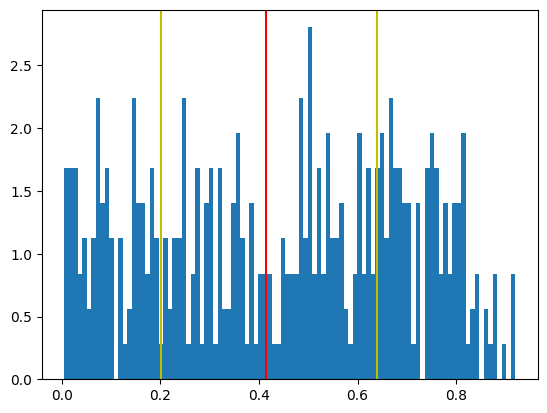

GaussianMixture(covariance_type='spherical', n_init=10)
AIC 43.661604391064884 BIC 51.59389786931227 score -0.05084821075777549
Gaussian 0 mean= [0.44336716] wgt= 1.0 cov= 0.06481843552883995
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -26.261799007962317 BIC -6.431065312343854 score 0.046489485907644
Gaussian 0 mean= [0.20184077] wgt= 0.4478103562769357 cov= 0.016512437227753446
Gaussian 1 mean= [0.6392383] wgt= 0.5521896437230643 cov= 0.018319694453466456
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -35.41911074229827 BIC -3.689936829308735 score 0.06592193684910035
Gaussian 0 mean= [0.44812008] wgt= 0.32191155428115986 cov= 0.012883144420721719
Gaussian 1 mean= [0.14503663] wgt= 0.32465184903375877 cov= 0.008638141533617085
Gaussian 2 mean= [0.71307194] wgt= 0.3534365966850814 cov= 0.00921227532606003


In [8]:
filename = DATA_DIR + RCI_FILE
loader = RCI_Loader()

for CELL_LINE in range(15):
    gene_to_rci = loader.load_gene_rci_values(filename,CELL_LINE)
    logs = list(gene_to_rci.values())
    antilogs = np.power(2,logs)
    cyto_pct = [x/(1+x) for x in antilogs]
    values = np.array(cyto_pct)
    values = values.reshape(-1, 1)

    model_1 = GaussianMixture(n_components=1, verbose=0, covariance_type='spherical', n_init=10) 
    model_1.fit(values)
    model_2 = GaussianMixture(n_components=2, verbose=0, covariance_type='spherical', n_init=10) 
    model_2.fit(values)
    model_3 = GaussianMixture(n_components=3, verbose=0, covariance_type='spherical', n_init=10) 
    model_3.fit(values)
    
    discrim = place_discriminant(
        model_2.means_[0],model_2.covariances_[0],model_2.weights_[0],
        model_2.means_[1],model_2.covariances_[1],model_2.weights_[1])
    
    print('Cell Line',CELL_LINE,all_cell_lines[CELL_LINE])
    print('Single mean',model_1.means_[0])
    print('Double mean',model_2.means_[0],model_2.means_[1])
    print('Gaussian discriminant',discrim)
    if discrim is None:   # not expected, but just in case...
        print('WARNING: discrim not found, using mean!')
        discrim = model_1.means_
    left =  model_2.means_[0]
    right = model_2.means_[1]
    plot(cyto_pct,left,right,discrim)
    
    show_gmm(model_1,values)
    show_gmm(model_2,values)
    show_gmm(model_3,values)